In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras


In [2]:
from keras.datasets import mnist

In [3]:
gpus = tf.config.list_physical_devices('CPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'CPU')
    print(gpus[0])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
1 Physical GPUs, 1 Logical GPU


In [3]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()

In [4]:
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1


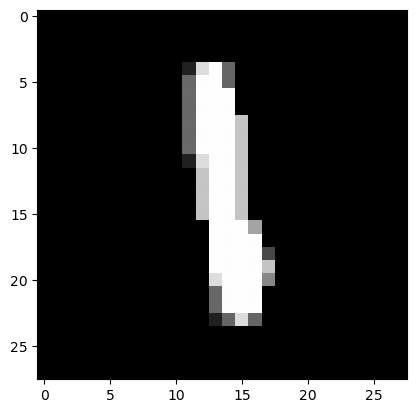

In [8]:
plt.imshow(train_X[200],cmap='Greys_r')
print(train_Y[200])

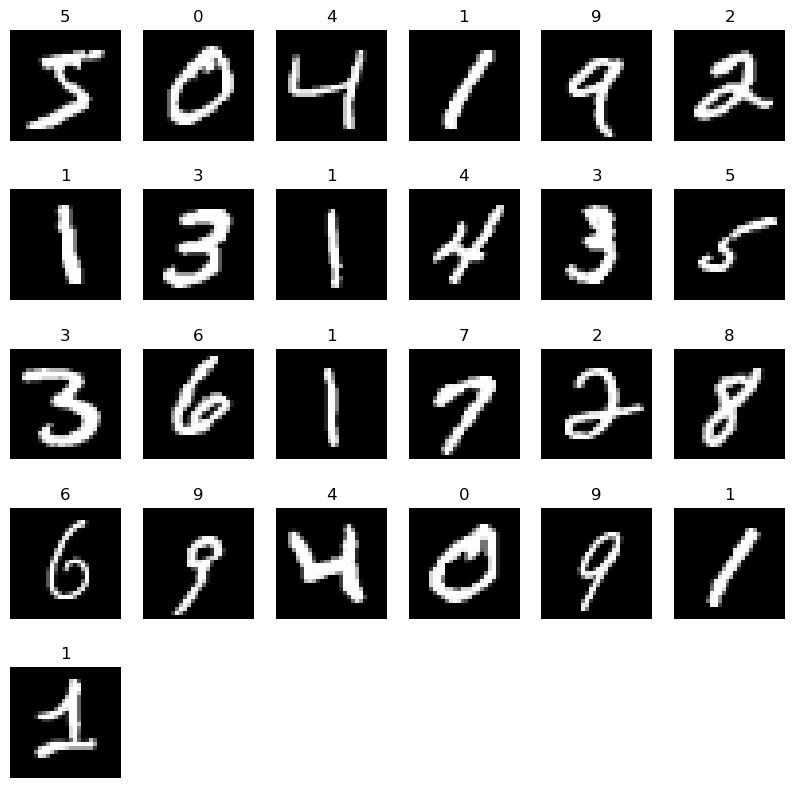

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,6,i+1) #int this indexing starts from 1
    plt.imshow(train_X[i],cmap='Greys_r')
    plt.title(train_Y[i])
    plt.axis('off')

In [9]:
print(train_X[645].shape)

(28, 28)


8


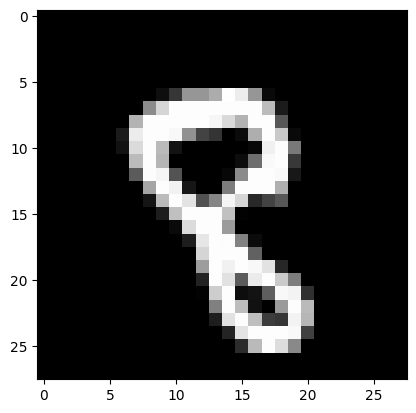

In [8]:
# to convert matrix into image
plt.imshow(train_X[6284],cmap='grey')
print(train_Y[6284])

In [9]:
print(np.unique(train_Y),len(np.unique(train_Y)))

[0 1 2 3 4 5 6 7 8 9] 10


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


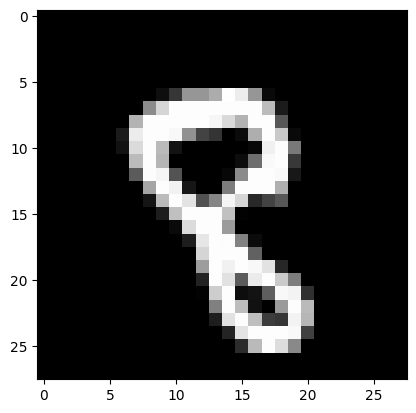

In [12]:
plt.imshow(train_X[6284],cmap='grey')
print(train_Y[6284])

In [13]:
train_X=train_X/255
test_X=test_X/255

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


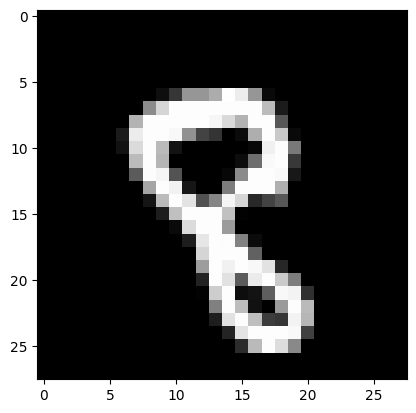

In [14]:
plt.imshow(train_X[6284],cmap='grey')
print(train_Y[6284])

In [15]:
# plt.imshow(train_Y[6284].reshape(-1,2))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [17]:
model=Sequential(name='ANN_MNIST_Classifier')
model.add(tf.keras.layers.Flatten()) # one hot encoder
model.add(Dense(600,input_dim=(784), activation='relu',name='Layer_1'))
model.add(Dense(500,activation='relu',name='Layer_2'))
model.add(Dense(300,activation='relu',name='Layer_3'))
model.add(Dense(100,activation='relu',name='Layer_4'))
model.add(Dense(50,activation='relu',name='Layer_5'))
model.add(Dense(10,activation='softmax',name='Layer_6'))

In [18]:
model.build((None,784))
model.summary()

Model: "ANN_MNIST_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Layer_1 (Dense)             (None, 600)               471000    
                                                                 
 Layer_2 (Dense)             (None, 500)               300500    
                                                                 
 Layer_3 (Dense)             (None, 300)               150300    
                                                                 
 Layer_4 (Dense)             (None, 100)               30100     
                                                                 
 Layer_5 (Dense)             (None, 50)                5050      
                                                                 
 Layer_6 (Dense)             (None, 10)       

In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy','Precision'])

In [20]:
hist=model.fit(train_X,train_Y,batch_size=100,epochs=10,validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 11s 11ms/step - loss: 0.2411 - accuracy: 0.9261 - precision: 0.9506 - val_loss: 0.1056 - val_accuracy: 0.9680 - val_precision: 0.9731
Epoch 2/10
540/540 [==============================] - 5s 9ms/step - loss: 0.0932 - accuracy: 0.9716 - precision: 0.9761 - val_loss: 0.0857 - val_accuracy: 0.9757 - val_precision: 0.9792
Epoch 3/10
540/540 [==============================] - 4s 8ms/step - loss: 0.0642 - accuracy: 0.9802 - precision: 0.9830 - val_loss: 0.0737 - val_accuracy: 0.9788 - val_precision: 0.9809
Epoch 4/10
540/540 [==============================] - 4s 7ms/step - loss: 0.0493 - accuracy: 0.9842 - precision: 0.9862 - val_loss: 0.0893 - val_accuracy: 0.9762 - val_precision: 0.9790
Epoch 5/10
540/540 [==============================] - 4s 7ms/step - loss: 0.0428 - accuracy: 0.9867 - precision: 0.9880 - val_loss: 0.0761 - val_accuracy: 0.9792 - val_precision: 0.9824
Epoch 6/10
540/540 [==============================] - 4s 7ms/step - 

In [21]:
hist.history

{'loss': [0.2410810887813568,
  0.09324120730161667,
  0.06416129320859909,
  0.04931960999965668,
  0.04281081631779671,
  0.03466558828949928,
  0.028109801933169365,
  0.0274122953414917,
  0.02450527995824814,
  0.02065747044980526],
 'accuracy': [0.9260740876197815,
  0.9716481566429138,
  0.980222225189209,
  0.9842222332954407,
  0.9867222309112549,
  0.9891296029090881,
  0.9915740489959717,
  0.9915740489959717,
  0.9926481246948242,
  0.9936110973358154],
 'precision': [0.9505727291107178,
  0.9761171340942383,
  0.9829713702201843,
  0.9861738085746765,
  0.9880242943763733,
  0.9902734160423279,
  0.9925239086151123,
  0.9922851324081421,
  0.9932883381843567,
  0.9942527413368225],
 'val_loss': [0.10560081154108047,
  0.08572904765605927,
  0.07366593182086945,
  0.08931857347488403,
  0.07614558935165405,
  0.08504754304885864,
  0.06746095418930054,
  0.1023852527141571,
  0.06666819751262665,
  0.06364153325557709],
 'val_accuracy': [0.9679999947547913,
  0.975666642189

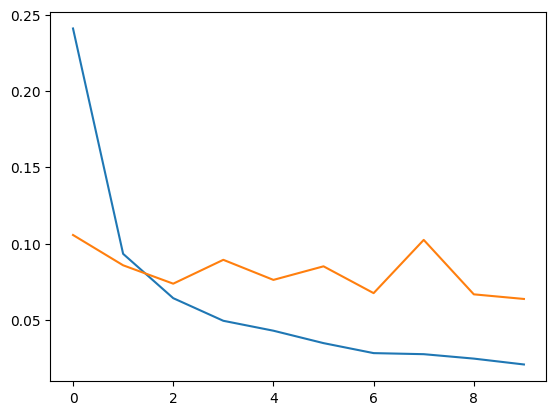

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

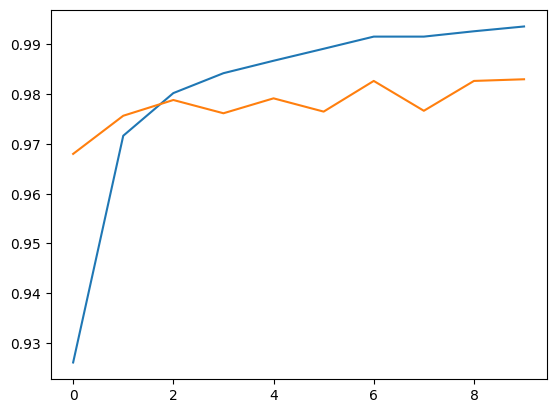

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [24]:
preds=model.evaluate(test_X,test_Y)

313/313 [==============================] - 2s 6ms/step - loss: 0.0811 - accuracy: 0.9808 - precision: 0.9826


In [25]:
model.predict(test_X[100].reshape(1,28,28))

1/1 [==============================] - 0s 130ms/step


array([[4.5017532e-05, 1.7862329e-08, 2.2264217e-07, 1.9005495e-09,
        9.2882801e-06, 4.8346042e-06, 9.9993944e-01, 1.7122016e-10,
        1.1861964e-06, 1.0072034e-08]], dtype=float32)

1/1 [==============================] - 0s 30ms/step
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


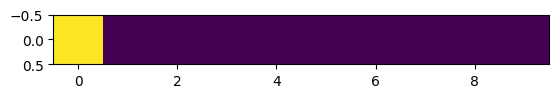

In [26]:
img=model.predict(test_X[101].reshape(1,28,28))
print(np.argmax(model.predict(test_X[101].reshape(1,28,28))))
print(test_Y[101])
plt.imshow(img)

1/1 [==============================] - 0s 46ms/step


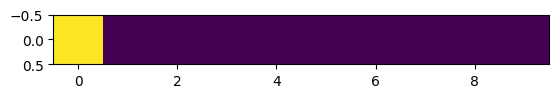

In [27]:
img=model.predict(test_X[101].reshape(1,28,28))
plt.imshow(img)